# Lab-5 Linear and Multi Linear Regression

## Tanishq Gupta - 19BCE1392

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
datafile = pd.DataFrame()
datafile[0] = np.arange(2000,2020)
datafile[1] = [50,54,62,78,65,69,72,77,85,98,75,80,82,85,88,75,90,93,95,98]

datafile1 = pd.DataFrame()
datafile1[0] = np.arange(2000,2020)
datafile1[1] = [50,54,62,65,68,70,71,74,76,80,82,84,86,90,91,93,94,95,98,100]

datafile.columns = ["Year","Placement"]
datafile1.columns = ["Year","Placement"]
print(datafile,"\n")
print(datafile1)

    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         78
4   2004         65
5   2005         69
6   2006         72
7   2007         77
8   2008         85
9   2009         98
10  2010         75
11  2011         80
12  2012         82
13  2013         85
14  2014         88
15  2015         75
16  2016         90
17  2017         93
18  2018         95
19  2019         98 

    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         65
4   2004         68
5   2005         70
6   2006         71
7   2007         74
8   2008         76
9   2009         80
10  2010         82
11  2011         84
12  2012         86
13  2013         90
14  2014         91
15  2015         93
16  2016         94
17  2017         95
18  2018         98
19  2019        100


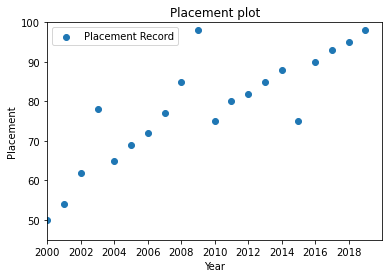

In [3]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend(['Placement Record'])
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

<AxesSubplot:>

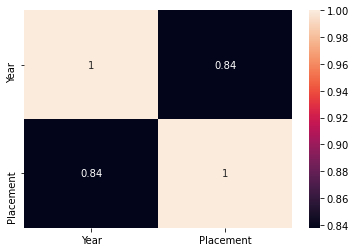

In [4]:
#correlation
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

In [5]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
print(train_x)
print(train_y)

regress.fit (train_x,train_y)

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[50]
 [54]
 [62]
 [78]
 [65]
 [69]
 [72]
 [77]
 [85]
 [98]
 [75]
 [80]
 [82]
 [85]
 [88]
 [75]
 [90]
 [93]
 [95]
 [98]]


LinearRegression()

In [6]:
#the coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.94661654]]
Intercept:  [-3833.17593985]


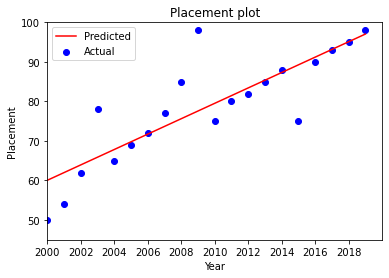

In [7]:
# calculating y=mx+c
plt.scatter(datafile.Year, datafile.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [8]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
model1 = regress.fit(train_x,train_y)

y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i], y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[50] [60.05714286]
[54] [62.0037594]
[62] [63.95037594]
[78] [65.89699248]
[65] [67.84360902]
[69] [69.79022556]
[72] [71.73684211]
[77] [73.68345865]
[85] [75.63007519]
[98] [77.57669173]
[75] [79.52330827]
[80] [81.46992481]
[82] [83.41654135]
[85] [85.36315789]
[88] [87.30977444]
[75] [89.25639098]
[90] [91.20300752]
[93] [93.14962406]
[95] [95.0962406]
[98] [97.04285714]
[[60.05714286]
 [62.0037594 ]
 [63.95037594]
 [65.89699248]
 [67.84360902]
 [69.79022556]
 [71.73684211]
 [73.68345865]
 [75.63007519]
 [77.57669173]
 [79.52330827]
 [81.46992481]
 [83.41654135]
 [85.36315789]
 [87.30977444]
 [89.25639098]
 [91.20300752]
 [93.14962406]
 [95.0962406 ]
 [97.04285714]]
   Year  Placement  Predicted
0  2000         50  60.057143
1  2001         54  62.003759
2  2002         62  63.950376
3  2003         78  65.896992
4  2004         65  67.843609


In [9]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 4.712330827067649
Mean Squared Error: 53.55274436090161
Root Mean Squared Error: 7.317974061234544


In [10]:
# using testing data
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['Year']])
test_y = np.asanyarray(datafile[['Placement']])
test_y_predicted = regress.predict(test_x)


In [11]:
print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 4.712330827067649
Mean square error (MSE):  53.55274436090161
R2-score: %.2f (RMSE): 0.7017349483512629


### DATAFILE1

In [12]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
regress1 = linear_model.LinearRegression()

train_x1 = np.asanyarray(datafile1[['Year']])
train_y1 = np.asanyarray(datafile1[['Placement']])
print(train_x1)
print(train_y1)

regress.fit (train_x1,train_y1)

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[ 50]
 [ 54]
 [ 62]
 [ 65]
 [ 68]
 [ 70]
 [ 71]
 [ 74]
 [ 76]
 [ 80]
 [ 82]
 [ 84]
 [ 86]
 [ 90]
 [ 91]
 [ 93]
 [ 94]
 [ 95]
 [ 98]
 [100]]


LinearRegression()

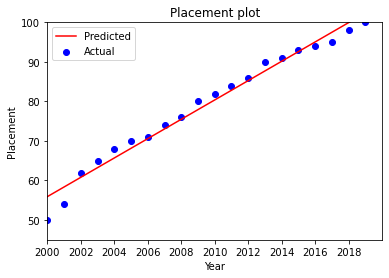

In [13]:
plt.scatter(datafile1.Year, datafile1.Placement,  color='blue',label="Actual")
plt.plot(train_x1, regress.coef_[0][0]*train_x1 + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [14]:
from sklearn import linear_model
regress1 = linear_model.LinearRegression()
model2 = regress1.fit(train_x1,train_y1)

y_predicted1 = regress1.predict(train_x1)
for i in range(0,len(train_x1)):
    print(train_y1[i], y_predicted1[i])
datafile['Predicted'] = y_predicted1
print(y_predicted1)
print(datafile.head())

[50] [55.91428571]
[54] [58.36015038]
[62] [60.80601504]
[65] [63.2518797]
[68] [65.69774436]
[70] [68.14360902]
[71] [70.58947368]
[74] [73.03533835]
[76] [75.48120301]
[80] [77.92706767]
[82] [80.37293233]
[84] [82.81879699]
[86] [85.26466165]
[90] [87.71052632]
[91] [90.15639098]
[93] [92.60225564]
[94] [95.0481203]
[95] [97.49398496]
[98] [99.93984962]
[100] [102.38571429]
[[ 55.91428571]
 [ 58.36015038]
 [ 60.80601504]
 [ 63.2518797 ]
 [ 65.69774436]
 [ 68.14360902]
 [ 70.58947368]
 [ 73.03533835]
 [ 75.48120301]
 [ 77.92706767]
 [ 80.37293233]
 [ 82.81879699]
 [ 85.26466165]
 [ 87.71052632]
 [ 90.15639098]
 [ 92.60225564]
 [ 95.0481203 ]
 [ 97.49398496]
 [ 99.93984962]
 [102.38571429]]
   Year  Placement  Predicted
0  2000         50  55.914286
1  2001         54  58.360150
2  2002         62  60.806015
3  2003         78  63.251880
4  2004         65  65.697744


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y1, y_predicted1))
print('Mean Squared Error:', metrics.mean_squared_error(train_y1, y_predicted1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y1, y_predicted1)))

Mean Absolute Error: 1.814210526315901
Mean Squared Error: 5.01755639097796
Root Mean Squared Error: 2.239990265822144


### Using testing and training data

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['Year']], datafile[['Placement']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005


In [17]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)

LinearRegression()

In [18]:
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.70675575]]
Intercept:  [-3349.2809948]


In [19]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          50
17         93
15         75
1          54
8          85
5          69
[[64.23051225]
 [93.24536006]
 [89.83184855]
 [65.937268  ]
 [77.88455828]
 [72.76429102]]


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))


Mean Absolute Error: 8.687453600594003
Mean Squared Error: 104.9748628433119
Root Mean Squared Error: 10.245724124887996


# Forest Fire

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import linear_model, metrics
import seaborn as sb
%matplotlib inline

In [22]:
df = pd.read_csv('forestfires.csv')

In [23]:
print(df.shape)
print("\n")
print(df.info())

(517, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


0.0
1090.84


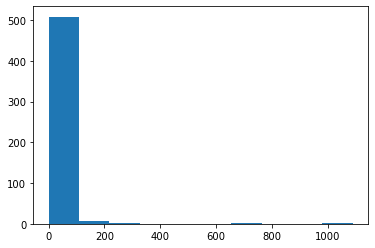

In [24]:
print(df['area'].min())
print(df['area'].max())
plt.hist(df['area'])
plt.show()

In [25]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'), (1,2,3,4,5,6,7),inplace=True)
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


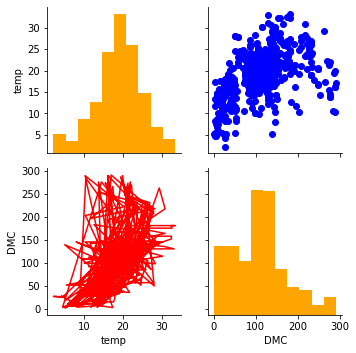

In [26]:
g = sb.PairGrid(data=df, vars=['temp','DMC'])
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='orange')

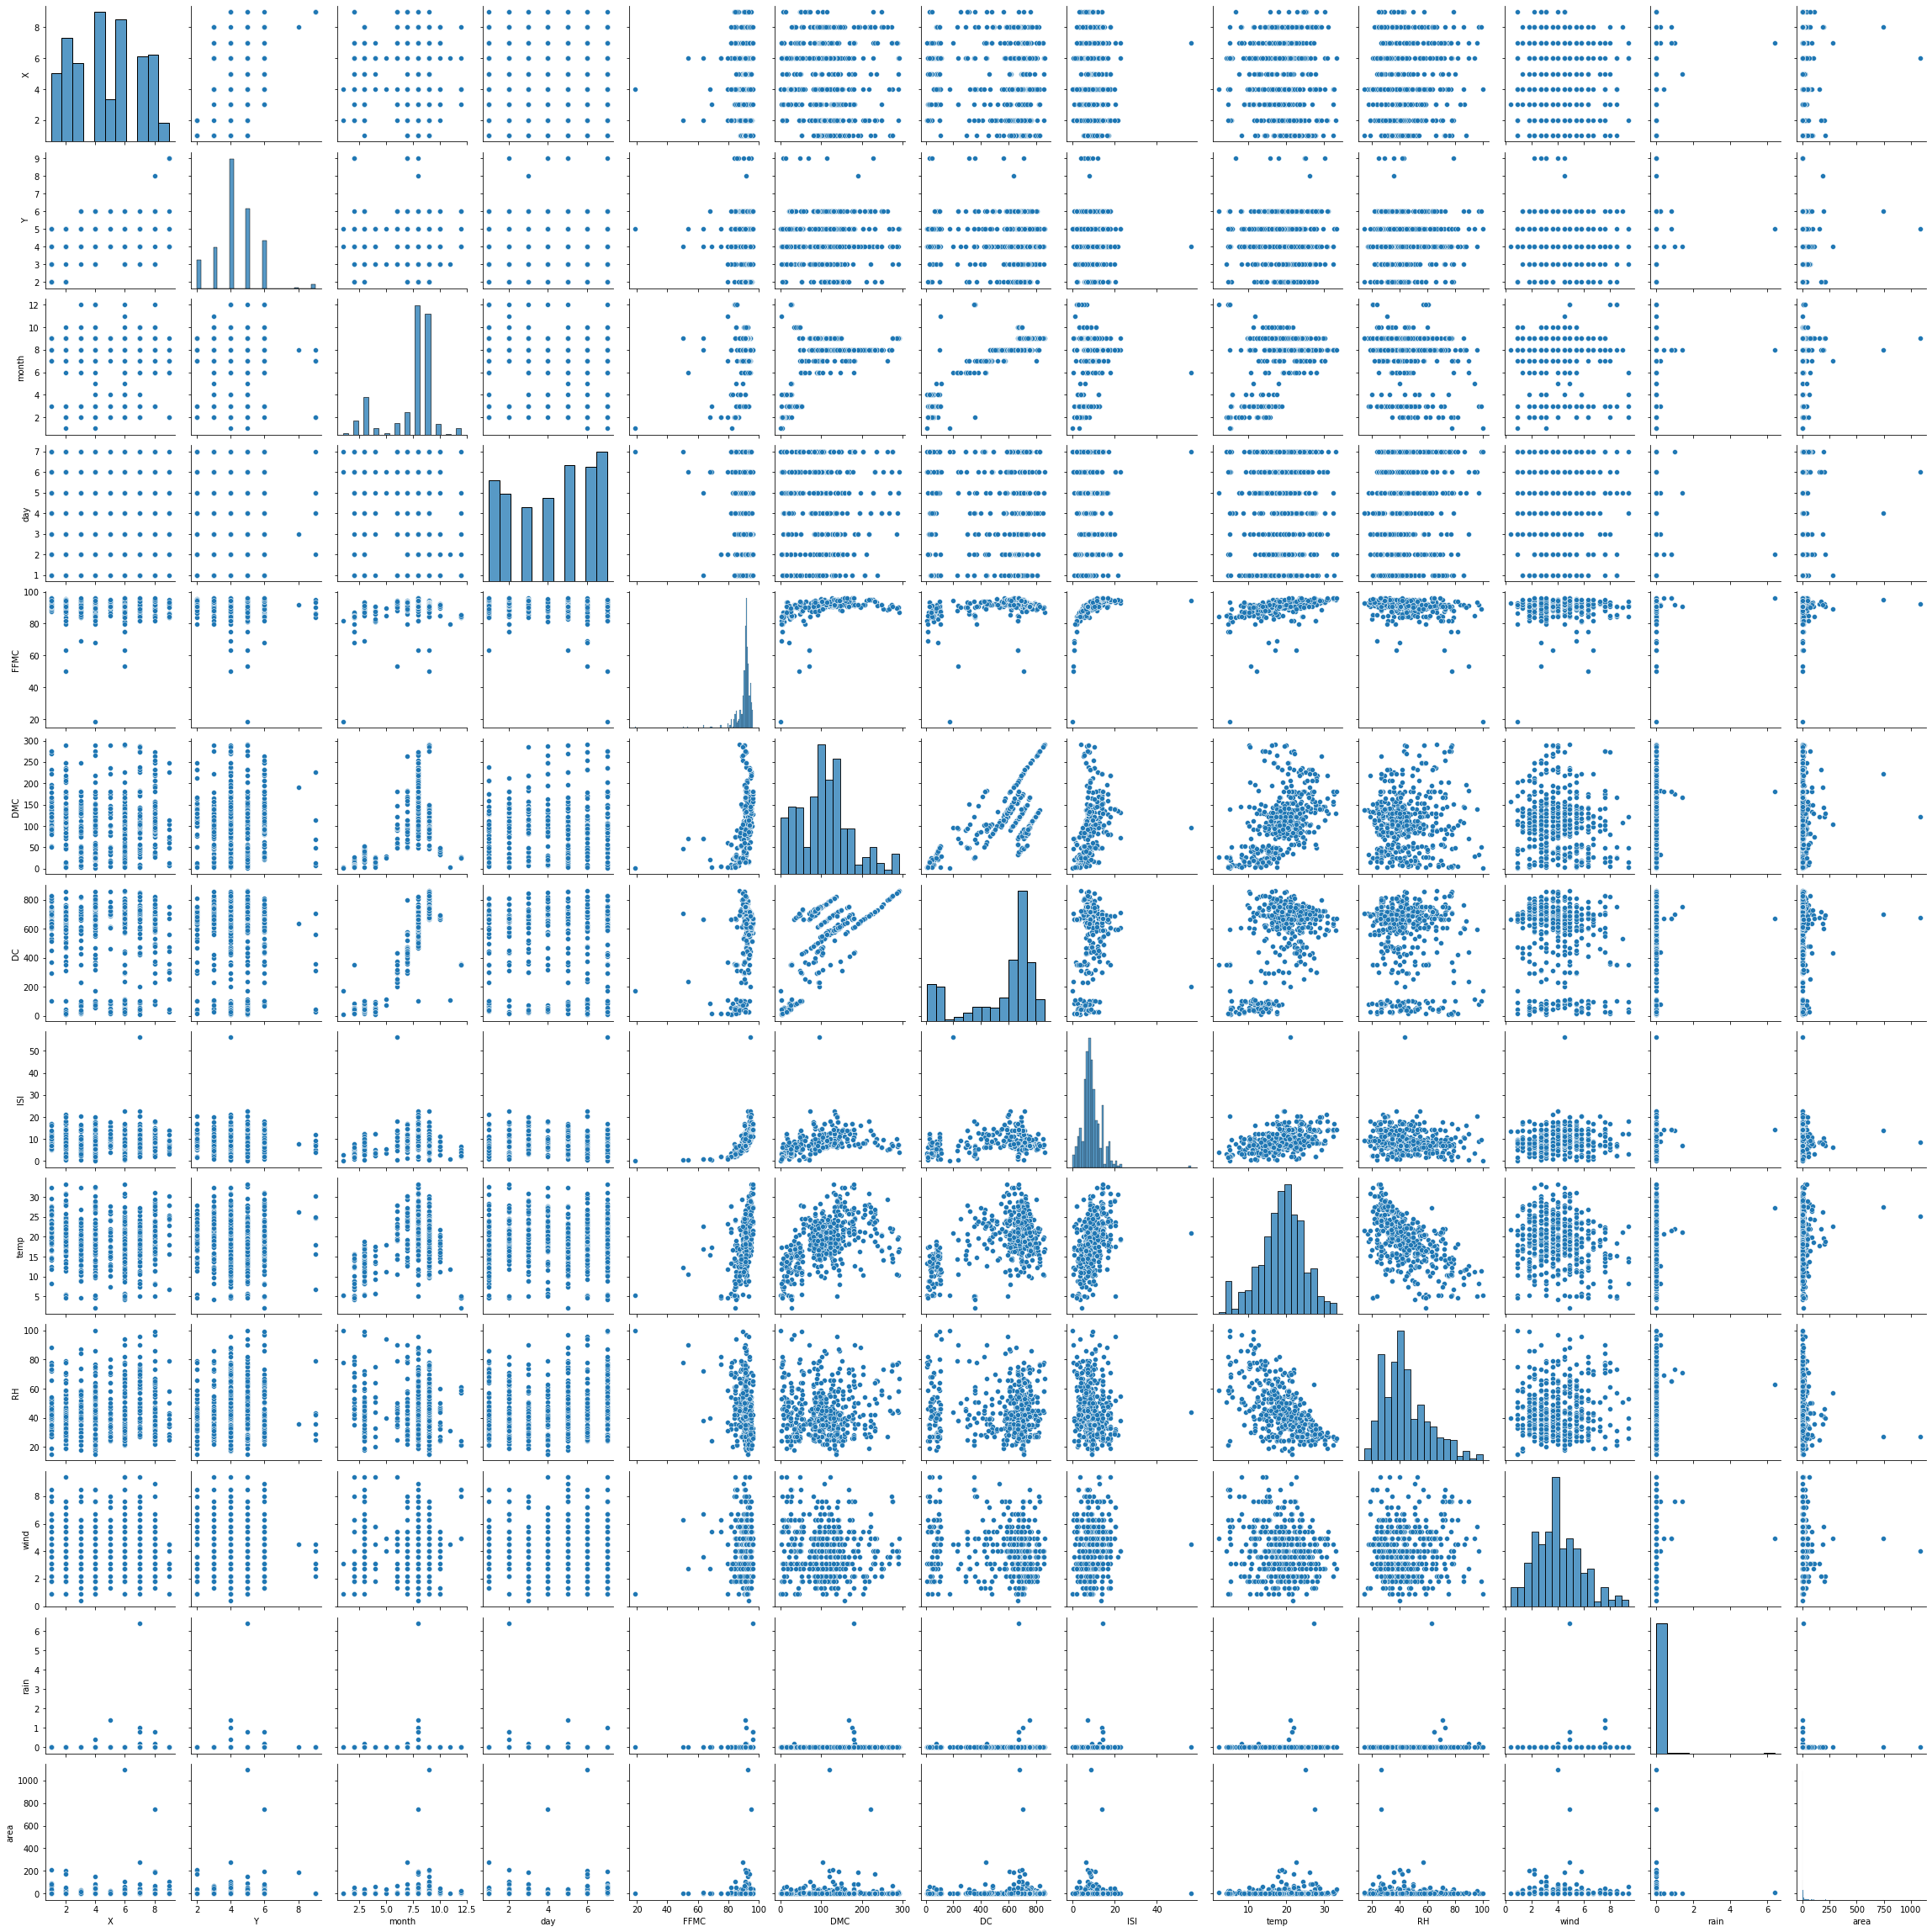

In [27]:
sb.pairplot(df)

In [28]:
df1=df.corr()

<AxesSubplot:>

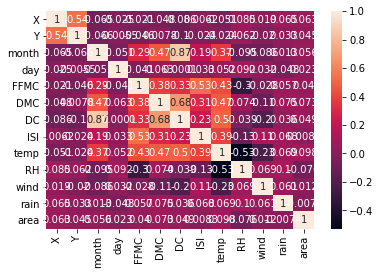

In [29]:
sb.heatmap(df1, annot=True)

In [30]:
df['Y'] = df['X'].apply(lambda x:np.nan if x==1 else x)
print(df[df['X']==1].head())
print(df.isnull().sum())

    X   Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
77  1 NaN      3    1  87.6   52.2  103.8   5.0   8.3  72   3.1   0.0   0.0
78  1 NaN      8    5  90.1  108.0  529.8  12.5  14.7  66   2.7   0.0   0.0
79  1 NaN      8    2  91.0  121.2  561.6   7.0  21.6  19   6.7   0.0   0.0
80  1 NaN      8    7  91.4  142.4  601.4  10.6  19.5  39   6.3   0.0   0.0
81  1 NaN      8    7  90.2   99.6  631.2   6.3  17.9  44   2.2   0.0   0.0
X         0
Y        48
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
area      0
dtype: int64


In [31]:
target = df['Y'].mean()
print(target)

5.044776119402985


In [32]:
df.fillna(df['Y'].mean(), inplace=True)
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [33]:
# Input and Output splitting
regress = linear_model.LinearRegression()
df2 = df.values
print(df2.shape)
train_x = (df2[:,0:12])
train_y = df2[:,12]
print(train_x.shape)
print(train_y.shape)

(517, 13)
(517, 12)
(517,)


In [34]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.75       0.71428571 0.18181818 ... 0.42352941 0.7        0.        ]
 [0.75       0.71428571 0.81818182 ... 0.21176471 0.05555556 0.        ]
 [0.75       0.71428571 0.81818182 ... 0.21176471 0.1        0.        ]
 ...
 [0.75       0.71428571 0.63636364 ... 0.64705882 0.7        0.        ]
 [0.         0.43496802 0.63636364 ... 0.31764706 0.4        0.        ]
 [0.625      0.57142857 0.90909091 ... 0.18823529 0.45555556 0.        ]]


In [35]:
regress.fit(train_x,train_y)

# The coefficients
print('Coefficients : ', regress.coef_)
print('Intercept : ', regress.intercept_)

Coefficients :  [  5.6396909   12.59750658  29.96893229   4.48435558  -6.9222803
  28.18637467 -25.58989389 -39.25422516  25.46756169 -19.19809221
  10.58939247 -18.44016727]
Intercept :  -8.259849100993572


In [36]:
# Prediction
y_predicted = regress.predict(train_x)
for i in range(len(train_x)):
    print(train_y[i], y_predicted[i])

0.0 7.848927276268574
0.0 12.075259363721768
0.0 13.023206230978898
0.0 -5.733589162092766
0.0 -3.3626475991452303
0.0 27.037368456697642
0.0 26.314286688786183
0.0 -0.6139602667985073
0.0 14.550541810967387
0.0 22.111503257399065
0.0 19.297698294227324
0.0 6.95502543299771
0.0 13.662037345599552
0.0 16.38741281754205
0.0 28.05709561095989
0.0 19.56366894948505
0.0 12.085592359131459
0.0 17.30487138750606
0.0 10.354691090520062
0.0 8.733037942765362
0.0 15.817533470853787
0.0 6.156703882763383
0.0 -5.781235275759938
0.0 26.022089276087776
0.0 22.84864584688411
0.0 17.791666714297342
0.0 21.988151306996443
0.0 14.922023227320492
0.0 31.86165239658102
0.0 24.374069770947294
0.0 17.720840443570573
0.0 2.4021740493311405
0.0 14.381467528619124
0.0 13.719225637615194
0.0 11.736143075020168
0.0 7.568721867939695
0.0 18.869053205778897
0.0 6.868825679500723
0.0 20.175639930174214
0.0 1.5175250254594683
0.0 18.56606018729544
0.0 13.038361146767665
0.0 -1.3236933890088238
0.0 8.640773094168766


0.0 7.7498613354676404
0.0 13.416472725741018
8.12 8.730753325657554
1.09 11.08603296258932
3.94 6.616339489551256
0.52 1.6991590933759273
2.93 1.527295667695757
5.65 15.448525742892281
20.03 12.432227336312861
1.75 5.299843242688214
0.0 6.075870070267873
12.64 12.615368236321986
0.0 18.480738509505215
11.06 25.994553985434642
0.0 2.491765326500797
0.0 2.4711833042506424
0.0 16.944929704073125
18.3 14.944361146604626
39.35 9.210319430283453
0.0 23.08713261323399
174.63 15.944369638977024
0.0 2.701083559938265
0.0 -19.121141841286637
7.73 15.558533061199407
16.33 20.612315893608148
5.86 28.954860003629292
42.87 29.98579340367163
12.18 34.43875358892275
16.0 13.040456685818823
24.59 5.755567333462356
0.0 2.778207171407457
28.74 26.46429171031877
0.0 28.968896868961913
9.96 -3.134108043697598
30.18 18.454487097008474
70.76 28.322589718842828
0.0 3.0249875094022567
0.0 -10.802139300349058
51.78 -6.909917824706264
3.64 7.508094378696761
3.63 28.825364472570655
0.0 27.312029698631626
0.0 26.

Text(0.5, 0, 'Area')

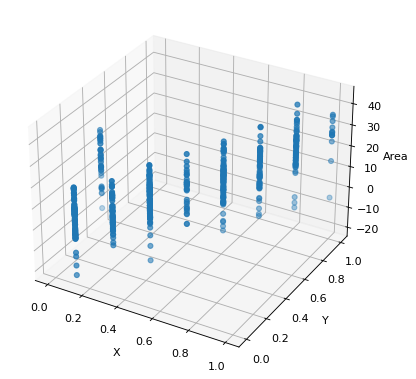

In [37]:
# Plotting

from matplotlib.pyplot import figure
figure(figsize=(8,6),dpi=80)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(train_x[:,0], train_x[:,1], y_predicted)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Area')

In [38]:
# Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error : ', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error :  19.2246607482649
Mean Squared Error :  3944.1265574863182
Root Mean Squared Error :  62.80228146720721


In [39]:
y=df.temp
x=df.drop('temp',axis=1)

### 80-20 Split

In [40]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
train_x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind,rain,area
147,8,8.0,9,2,84.4,73.4,671.9,3.2,28,3.6,0.0,0.96
318,6,6.0,9,4,92.8,119.0,783.5,7.5,27,2.2,0.0,0.00
228,4,4.0,9,7,93.5,149.3,728.6,8.1,26,3.1,0.0,64.10
285,2,2.0,7,7,93.9,169.7,411.8,12.3,40,6.3,0.0,0.00
257,4,4.0,8,6,94.2,117.2,581.1,11.0,44,2.7,0.0,0.68


In [41]:
regress.fit(train_x,train_y)

# The coefficients
print('Coefficients : ', regress.coef_)
print('Intercept : ', regress.intercept_)

Coefficients :  [-0.11231366  0.23450759 -0.55359719  0.22991532  0.0042392   0.01993634
  0.0100061   0.26209834 -0.19384906 -0.34189536  1.73655905  0.00302423]
Intercept :  20.900902978525757


In [42]:
# Prediction
y_predicted = regress.predict(train_x)

In [43]:
# Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error : ', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error :  2.7199476590302805
Mean Squared Error :  12.19463412827036
Root Mean Squared Error :  3.4920816325324298


### 70-30 Split

In [44]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind,rain,area
261,3,3.0,8,5,91.6,112.4,573.0,8.9,84,7.6,0.0,3.30
475,2,2.0,6,4,93.7,121.7,350.2,18.0,40,9.4,0.0,3.19
387,5,5.0,3,4,90.9,18.9,30.6,8.0,48,5.4,0.0,0.00
394,6,6.0,2,1,84.1,4.6,46.7,2.2,68,1.8,0.0,0.00
242,2,2.0,8,7,94.2,122.3,589.9,12.9,66,4.0,0.0,10.13


In [45]:
regress.fit(train_x,train_y)

# The coefficients
print('Coefficients : ', regress.coef_)
print('Intercept : ', regress.intercept_)

Coefficients :  [-0.10367837  0.30184795 -0.58287502  0.20297145 -0.02913842  0.02011248
  0.01130523  0.26988238 -0.18098118 -0.41081573  1.47697344  0.0045428 ]
Intercept :  22.786533627310178


In [46]:
# Prediction
y_predicted = regress.predict(train_x)
# Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error : ', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error :  2.62689581278468
Mean Squared Error :  11.513608106675266
Root Mean Squared Error :  3.3931708042294697


### 60-40 Split

In [47]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.4)
train_x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind,rain,area
261,3,3.0,8,5,91.6,112.4,573.0,8.9,84,7.6,0.0,3.30
320,6,6.0,9,4,92.8,119.0,783.5,7.5,34,7.2,0.0,34.36
32,6,6.0,9,5,88.6,69.7,706.8,5.8,37,1.8,0.0,0.00
390,7,7.0,2,1,84.7,9.5,58.3,4.1,71,6.3,0.0,9.96
372,4,4.0,8,7,92.0,203.2,664.5,8.1,75,0.9,0.0,0.00


In [48]:
regress.fit(train_x,train_y)

# The coefficients
print('Coefficients : ', regress.coef_)
print('Intercept : ', regress.intercept_)

Coefficients :  [-0.14219552  0.24283211 -0.43423428  0.08374571 -0.04892662  0.01977787
  0.00973028  0.29099087 -0.20030532 -0.33909612  1.57457493  0.00249775]
Intercept :  25.862222103918054


In [49]:
# Prediction
y_predicted = regress.predict(train_x)
# Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error : ', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error :  2.6200105508346545
Mean Squared Error :  11.723018637916551
Root Mean Squared Error :  3.4238894021151665


### 90-10 Split

In [50]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)
train_x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind,rain,area
203,8,8.0,10,3,91.4,37.9,673.8,5.2,37,2.7,0.0,13.70
289,7,7.0,7,6,91.6,104.2,474.9,9.0,30,1.8,0.0,0.00
9,7,7.0,9,6,92.5,88.0,698.6,7.1,40,4.0,0.0,0.00
266,6,6.0,8,2,94.3,131.7,607.1,22.7,55,4.0,0.0,0.17
499,7,7.0,8,2,96.1,181.1,671.2,14.3,63,4.9,6.4,10.82


In [51]:
regress.fit(train_x,train_y)

# The coefficients
print('Coefficients : ', regress.coef_)
print('Intercept : ', regress.intercept_)

Coefficients :  [-0.13458367  0.2804743  -0.65520251  0.20424529 -0.01333563  0.01976257
  0.01053051  0.24906367 -0.19120148 -0.42108122  1.78009334  0.00253514]
Intercept :  23.224637783538565


In [52]:
# Prediction
y_predicted = regress.predict(train_x)
# Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error : ', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error :  2.6871088781294272
Mean Squared Error :  12.03848699442151
Root Mean Squared Error :  3.469652287250339


Here it can be observed that amongst the four different split variations, 
70-30 split gives the best results with a Mean Absolute Error of 2.62689581278468, Mean Squared Error of 11.513608106675266 and Root Mean Squared Error of 3.3931708042294697